In [1]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3.9.90:
      Successfully uninstalled nvidia-curand-cu12-10.3.9.90
  Attemptin

In [2]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [3]:
import torch
print(torch.__version__)

2.5.1+cu124


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
# Define the transformation (you can modify it if needed)
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

In [6]:
# Load the training dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
# Load the training dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True, num_workers=2
)

Files already downloaded and verified


In [8]:
# Load the test dataset
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=64, shuffle=False, num_workers=2
)

Files already downloaded and verified


In [9]:
# Class names
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

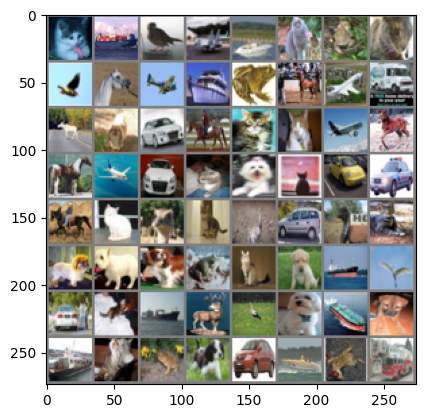

cat   ship  bird  plane ship  cat   frog  cat  


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))


In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

# Define transformations (optional: normalization, random crop, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Download CIFAR-10 training data
train_dataset_full = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Create train/validation split (e.g., 45k train / 5k validation)
train_size = int(0.9 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])

# Download CIFAR-10 test data
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


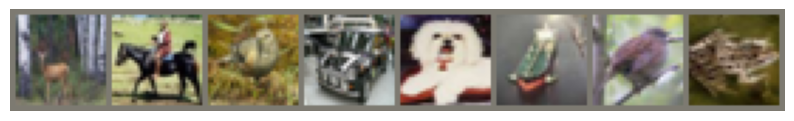

Labels:  deer horse  bird automobile   dog  ship  bird  frog


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img * torch.tensor((0.2470, 0.2435, 0.2616)).view(3,1,1) + torch.tensor((0.4914, 0.4822, 0.4465)).view(3,1,1)  # Unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get a batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))  # Display first 8 images

# Print labels
print('Labels:', ' '.join('%5s' % train_dataset_full.classes[labels[j]] for j in range(8)))

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # after 3 pools on 32x32 input -> 4x4 feature map
        self.fc2 = nn.Linear(256, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # conv1 + ReLU + pool
        x = self.pool(F.relu(self.conv2(x)))  # conv2 + ReLU + pool
        x = self.pool(F.relu(self.conv3(x)))  # conv3 + ReLU + pool
        x = x.view(-1, 128 * 4 * 4)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [14]:
# # Instantiate model
# model = MyCNN()

# # Move model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Define Loss and Optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.to(device)

#         # Zero the gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(inputs)

#         # Compute loss
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import os

# ======================
# 1. Set device
# ======================
device = torch.device('cpu')
print('Using device:', device)

# ======================
# 2. Define transforms
# ======================
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # data augmentation
    transforms.RandomCrop(32, padding=4),  # data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# ======================
# 3. Load datasets
# ======================
# Train+Val dataset
train_val_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)

# Split into train and val
train_size = int(0.9 * len(train_val_dataset))  # 45k train, 5k val
val_size = len(train_val_dataset) - train_size
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# Test dataset
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

# ======================
# 4. Define model
# ======================
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = MyCNN().to(device)

# ======================
# 5. Loss and optimizer
# ======================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ======================
# 6. Training function
# ======================
def train(model, loader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
    train_loss = running_loss / len(loader)
    train_acc = 100. * correct / total
    return train_loss, train_acc

# ======================
# 7. Validation function
# ======================
def validate(model, loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
    val_loss = running_loss / len(loader)
    val_acc = 100. * correct / total
    return val_loss, val_acc

# ======================
# 8. Test function
# ======================
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    test_acc = 100. * correct / total
    return test_acc

# ======================
# 9. Train the model
# ======================
num_epochs = 20
best_val_acc = 0

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)
    
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")
    
    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print('Saved Best Model!')

# ======================
# 10. Load best model and Test
# ======================
model.load_state_dict(torch.load('best_model.pth'))
test_acc = test(model, test_loader)
print(f"Test Accuracy: {test_acc:.2f}%")


Using device: cpu
Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20]
Train Loss: 1.7054 | Train Acc: 36.77%
Val   Loss: 1.3888 | Val   Acc: 49.82%
Saved Best Model!
Epoch [2/20]
Train Loss: 1.3647 | Train Acc: 50.65%
Val   Loss: 1.1870 | Val   Acc: 57.24%
Saved Best Model!
Epoch [3/20]
Train Loss: 1.2030 | Train Acc: 57.02%
Val   Loss: 1.0565 | Val   Acc: 62.62%
Saved Best Model!
Epoch [4/20]
Train Loss: 1.0821 | Train Acc: 61.55%
Val   Loss: 1.0050 | Val   Acc: 65.06%
Saved Best Model!
Epoch [5/20]
Train Loss: 1.0059 | Train Acc: 64.61%
Val   Loss: 0.9481 | Val   Acc: 66.06%
Saved Best Model!
Epoch [6/20]
Train Loss: 0.9491 | Train Acc: 66.75%
Val   Loss: 0.8623 | Val   Acc: 70.18%
Saved Best Model!
Epoch [7/20]
Train Loss: 0.8944 | Train Acc: 68.64%
Val   Loss: 0.8497 | Val   Acc: 70.34%
Saved Best Model!
Epoch [8/20]
Train Loss: 0.8688 | Train Acc: 69.92%
Val   Loss: 0.8265 | Val   Acc: 71.04%
Saved Best Model!
Epoch [9/20]
Train Loss: 0.8357 | 

/tmp/ipykernel_13/3147886335.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Accuracy: 77.02%


In [16]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader, random_split

# # ======================
# # 1. Set device (CPU only)
# # ======================
# device = torch.device('cpu')
# print('Using device:', device)

# # ======================
# # 2. Define transforms
# # ======================
# transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomCrop(32, padding=4),
#     transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
# ])

# # ======================
# # 3. Load datasets
# # ======================
# train_val_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# train_size = int(0.9 * len(train_val_dataset))
# val_size = len(train_val_dataset) - train_size
# train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
# val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)
# test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

# # ======================
# # 4. Define Model
# # ======================
# class MyCNN(nn.Module):
#     def __init__(self):
#         super(MyCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.dropout = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(128 * 4 * 4, 256)
#         self.fc2 = nn.Linear(256, 10)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = x.view(-1, 128 * 4 * 4)
#         x = self.dropout(torch.relu(self.fc1(x)))
#         x = self.fc2(x)
#         return x

# model = MyCNN().to(device)

# # ======================
# # 5. Define Loss and Optimizer
# # ======================
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # ======================
# # 6. Training, Validation, Testing Functions
# # ======================
# def train(model, loader):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     for inputs, labels in loader:
#         inputs, labels = inputs.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = outputs.max(1)
#         total += labels.size(0)
#         correct += predicted.eq(labels).sum().item()

#     return running_loss / len(loader), 100. * correct / total

# def evaluate(model, loader):
#     model.eval()
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for inputs, labels in loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)

#             running_loss += loss.item()
#             _, predicted = outputs.max(1)
#             total += labels.size(0)
#             correct += predicted.eq(labels).sum().item()

#     return running_loss / len(loader), 100. * correct / total

# def test(model, loader):
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for inputs, labels in loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, predicted = outputs.max(1)
#             total += labels.size(0)
#             correct += predicted.eq(labels).sum().item()

#     return 100. * correct / total

# # ======================
# # 7. Train the model
# # ======================
# num_epochs = 20
# best_val_acc = 0

# for epoch in range(num_epochs):
#     train_loss, train_acc = train(model, train_loader)
#     val_loss, val_acc = evaluate(model, val_loader)

#     print(f"Epoch [{epoch+1}/{num_epochs}]")
#     print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
#     print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")

#     # Save best model
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         torch.save(model.state_dict(), 'best_model.pth')
#         print('Saved Best Model!')

# # ======================
# # 8. Test the model
# # ======================
# model.load_state_dict(torch.load('best_model.pth'))
# test_acc = test(model, test_loader)
# print(f"Final Test Accuracy: {test_acc:.2f}%")
